# K-NEAREST NEIGHBOUR CLASSIFIER

The Nearest Neighbour algorithm is the simplest form of IBL. Instance-based learning is a family of learning algorithms that compare new problem instances with existing instances in the training data. Predictions for new instances are based on their similarity to stored instances (the basis of the similarity measure is typically distance). 

# <u>Nearest Neighbour Algorithm</u>
- Given a test case with a value to be predicted, identify which stored case it is nearest.
- Assigns the new test case the same class as the nearest neighbour.
- Requires a distance metric.

This very simple algorithm is very susceptible to noise. 
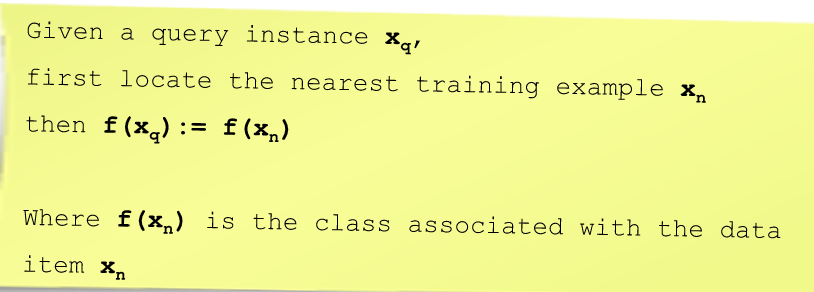[1]

In [1]:
import numpy as np
from collections import Counter

The training set contains 4000 training instances, while the test set contains 1000 test instances.Each instance is defined by a feature vector containing 10 feature values. The first 10 columns in both the training and test dataset correspondto the 10 features. All featuresare continuous valued features (there are no categorical features).
The 11thcolumn,in the test and training dataset,contains the class. You will notice that this is a multi-class classification problem. There are three classes (1, 2 or 3)

In [2]:
training_file = np.genfromtxt(r"trainingData.csv",
                              delimiter = ",")
test_file = np.genfromtxt(r"testData.csv",
                              delimiter = ",")

##  EUCLIDEAN DISTANCE
Compute the Euclidean distance for one dimension. The distance between two points in one dimension is simply the absolute value of the difference between their coordinates. Mathematically, this is shown as |p1 - q1| where p1 is the first coordinate of the first point and q1 is the first coordinate of the second point. [2]

In [3]:
# The function calculateDistance computes and returns the euclidean distance for test query against all the training instances and the
#     index sorted list of the euclidean distance

def calculateDistance(trainingdata,testdata):
    distance = np.sqrt(np.sum(np.square(trainingdata -testdata),axis=1))
    return distance ,np.argsort(distance)

In [4]:
# Slicing the training and test files to access all the rows and columns except the column that contains class
test_data = test_file[:,:10]
training_data = training_file[:,:10]
class_array = []

k = int(input("Enter the range K value "))
for each_row in range(len(test_data)):
#    Calculating euclidean distance for each test query
    distances , sorted_distances = calculateDistance(training_data,test_data[each_row])
    temp_class_array = []
    for i in range(k):
        temp_class_array.append(training_file[sorted_distances[i],10])
#     Assigning the most encountered class to the test query
    class_to_be_assigned = Counter(temp_class_array).most_common(1)[0][0]
    class_array.append(class_to_be_assigned)
counter = 0
for i in range(len(class_array)):
#     Validating and finding accuracy for the created model
    if class_array[i] == test_file[i,10]:
        counter+=1
print("Accuracy = ", ((counter/len(class_array))*100),"% for K = ", k )

Enter the range K value 10
Accuracy =  93.10000000000001 % for K =  10


### REFERENCES
[1] https://cit.instructure.com/courses/20485/files/247831?module_item_id=118405

[2] https://sciencing.com/how-to-calculate-euclidean-distance-12751761.html